In [6]:
from bs4 import BeautifulSoup as soup
import requests
import pandas as pd

In [7]:
#Inital request
url = 'https://coinmarketcap.com'
res = requests.get(url)
soup = soup(res.content, 'html.parser')

In [20]:
#Gather Asset names and prices 
asset_name = soup.find_all("div", {"class":"sc-16r8icm-0 escjiH"})
asset_price = soup.find_all("div", {"class":"sc-131di3y-0 cLgOOr"})

#Set inital conditions
cnt = 0
price_list = []
asset_list = []
df_list = []
top10 = {}

#Gather asset names
# - I was only able to grab the first 10. I'm not sure if there is a security measure in place that prevents more than 10 returning but I didnt want to risk falling down a rabithole trying to figure that out.
for asset in asset_name:
    asset_list.append(asset.find('p', {'class': 'sc-1eb5slv-0 iworPT'}).text)
    top10['Asset'] = asset_list
    df_list.append(top10)
    
    #Retreving the associated price of the asset. 
    # - Prices for the entire page came back. So, this tells me the issue above does have to do only with asset names. I made this iteration dependent on the total count of  asset names gathered.
    for price in asset_price:
        if cnt != len(asset_name):
            try:
                price_list.append(price.find('a', {'class': 'cmc-link'}).text)
                cnt +=1
                top10['Price'] = price_list
                df_list.append(top10)
            except:
                AttributeError
                continue
                
#Pass both lists to a dictionary
res = {}
for key in asset_list:
    for value in price_list:
        res[key] = value
        price_list.remove(value)
        break
        
#Save to df
df = pd.DataFrame.from_dict(res, orient ='index').rename(columns = {0:'Price'})
df

,Price
Bitcoin,"$38,347.15"
Ethereum,"$2,640.05"
Tether,$1.00
BNB,$382.07
USD Coin,$1.00
XRP,$0.7913
Cardano,$0.9418
Solana,$89.28
Avalanche,$79.65
Terra,$49.27


In [ ]:
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df.Price.astype('float')

<AxesSubplot:>

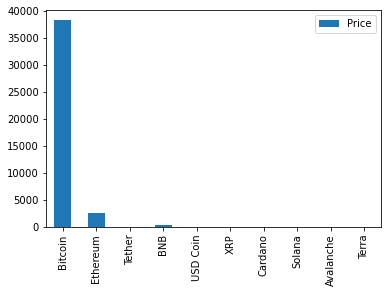

In [30]:
df.plot.bar()